# HW7: Using mean zonal wind to get stationary Rossby waves



In [ ]:
!pip install cartopy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [150]:
# zonal wind at 100hPa on 9/1/2022
u = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/Atmos_Dynamics/data_0.nc').sel(date=20220901).u.sel(pressure_level=100)

## Problem 2

In [170]:
# get mean zonal wind
u_mean = np.mean(u, axis=1)

# define radius of earth
Re = 6371e3 # m

# define ks
ks = np.arange(1, 7) # unitless

# get beta=df/dy~f/y
beta = 2*(7.291e-5)*np.cos(np.radians(u.latitude.values))/(Re)

# get critical wave number and make it unitless
k_crits = np.sqrt(np.divide(beta, u_mean))*Re*np.cos(np.radians(u.latitude.values))

/usr/local/lib/python3.10/dist-packages/xarray/core/computation.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [171]:
# loop to find valid latitudes
valid_k = []
for i in range(len(ks)):
  valid_k.append([])
  for j in range(len(u.latitude)):
    if ks[i] <= k_crits[j]:
      valid_k[i].append(u.latitude[j])
    else:
      valid_k[i].append(np.nan)

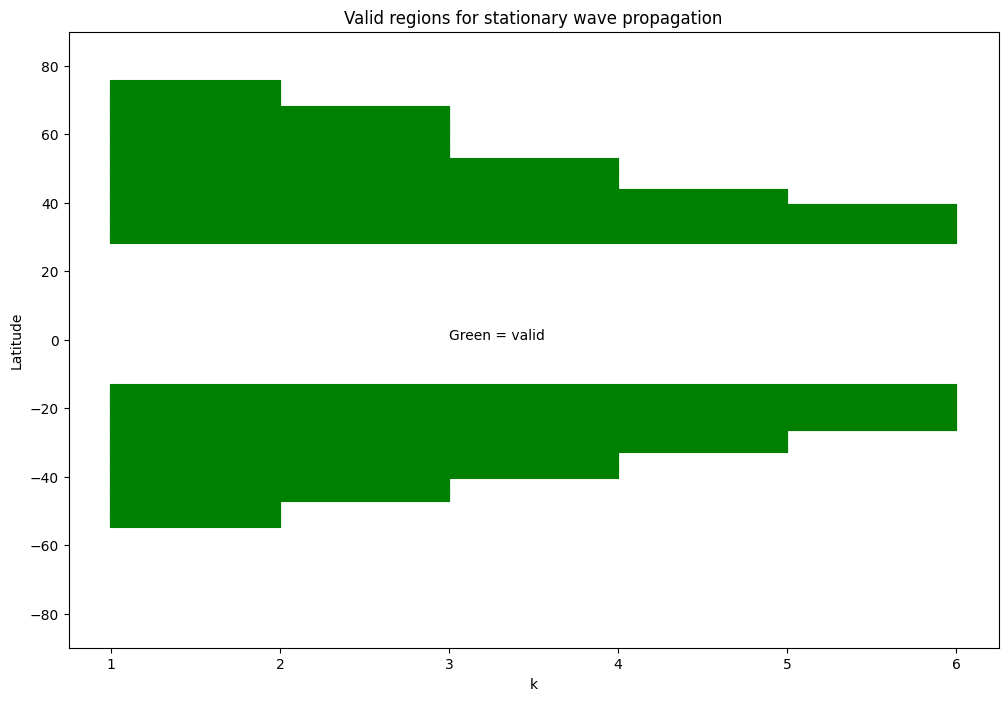

In [172]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ks, valid_k, c='green')
ax.set_xlabel('k')
ax.set_ylabel('Latitude')
ax.annotate('Green = valid', (3, 0))
ax.set_ylim([-90, 90])
ax.set_title('Valid regions for stationary wave propagation');

## Problem 3

In [48]:
# define ks
ks = np.divide(np.arange(-10, 11), Re*np.cos(np.radians(45))) # 1/m
H = 5000 # m
g = 9.8 # m/s^2
f = 2*((7.3e-5)*np.sin(np.radians(45))) # 1/s

In [51]:
# shallow water Rossby
ls = np.divide(np.arange(0, 4), Re) # 1/m
Ld = np.sqrt(g*H)/f # m
b = f/Re # at lat=45 degrees

# get omegas/f as a function of k*Ld
omegas_f_R = []
for i in range(len(ks)):
  omegas_f_R.append([])
  for l in ls:
    omega = -1*(ks[i]*b)/((ks[i]**2)+(l**2)+(1/Ld**2))
    if omega >= 0:
      omegas_f_R[i].append(omega/f)
    else:
      omegas_f_R[i].append(np.nan)

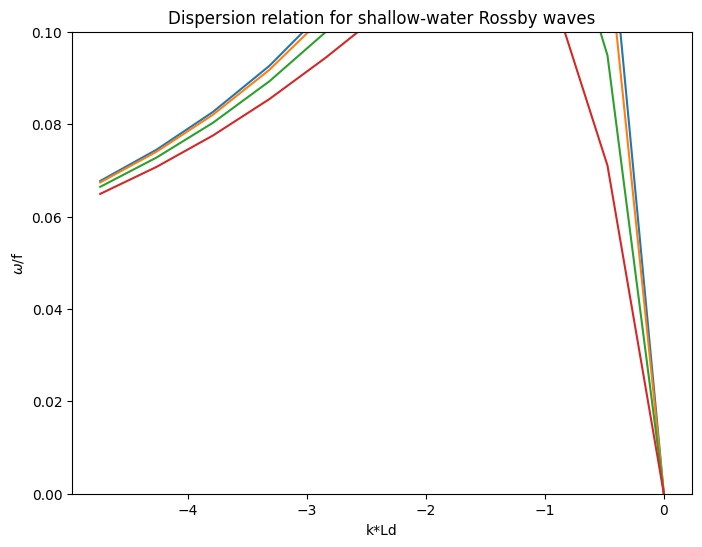

In [52]:
# plotting shallow water Rossby alone
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks*Ld, omegas_f_R)
ax.set_xlabel('k*Ld')
ax.set_ylabel('$\omega$/f')
ax.set_ylim([0, 0.1])
ax.set_title('Dispersion relation for shallow-water Rossby waves');

In [64]:
# shallow water gravity waves
rad_gH = np.sqrt(g*H) # m

omegas_f_G = []
for i in range(len(ks)):
  omega = ks[i]*rad_gH
  omegas_f_G.append(omega/f)
  omega = -ks[i]*rad_gH
  omegas_f_G.append(omega/f)

# reshape
omegas_f_G = np.reshape(omegas_f_G, (21, 2))

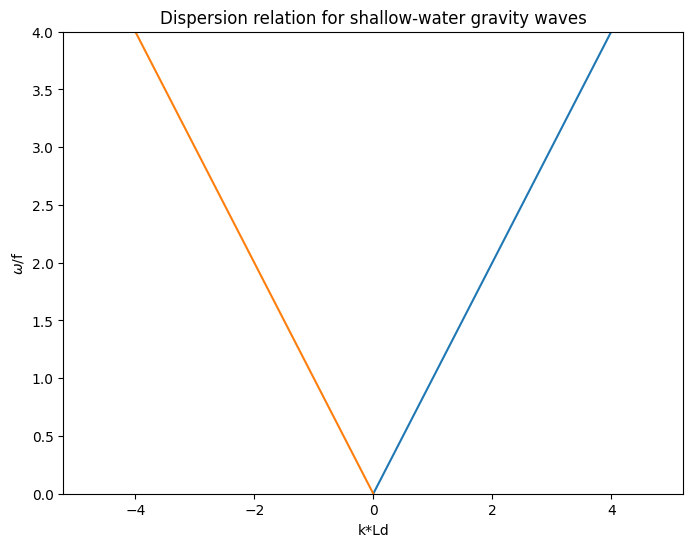

In [65]:
# plot gravity waves alone
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks*Ld, omegas_f_G)
ax.set_xlabel('k*Ld')
ax.set_ylabel('$\omega$/f')
ax.set_ylim([0, 4])
ax.set_title('Dispersion relation for shallow-water gravity waves');

In [75]:
# shallow water inertial gravity waves
fs = [2*(7.3e-5)*np.sin(np.radians(5)), 2*(7.3e-5)*np.sin(np.radians(25)), 2*(7.3e-5)*np.sin(np.radians(45))]
omegas_f_P = []
test = []
for i in range(len(ks)):
  for f in fs:
    omega = np.sqrt(f**2 + g*H*(ks[i]**2))
    test.append(omega)
    omegas_f_P.append(omega/f)

# reshape to plot per f value
omegas_f_P = np.reshape(omegas_f_P, (21, 3))

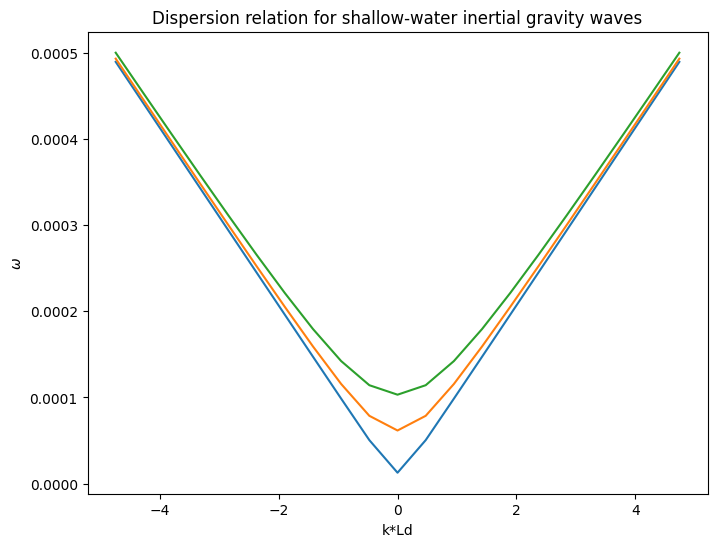

In [80]:
# plot inertial gravity waves alone
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks*Ld, np.reshape(test, (21,3)))
ax.set_xlabel('k*Ld')
ax.set_ylabel('$\omega$')
# ax.set_ylim([0, 4])
ax.set_title('Dispersion relation for shallow-water inertial gravity waves');

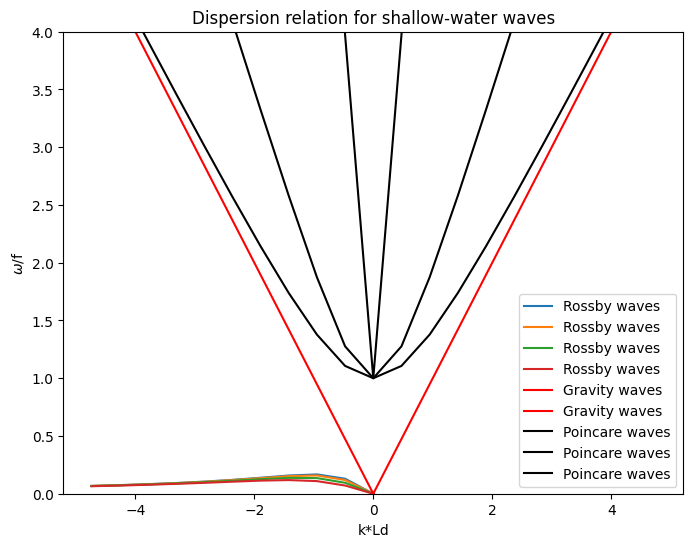

In [68]:
# plot them all together
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks*Ld, omegas_f_R, label='Rossby waves')
ax.plot(ks*Ld, omegas_f_G, label='Gravity waves', c='red')
ax.plot(ks*Ld, omegas_f_P, label='Poincare waves', c='black')
ax.legend()
ax.set_xlabel('k*Ld')
ax.set_ylabel('$\omega$/f')
ax.set_ylim([0, 4])
ax.set_title('Dispersion relation for shallow-water waves');

## Problem 4

In [27]:
# get kelvin waves and add to the plot
omegas_f_K = []
for i in range(len(ks)):
  omega = ks[i]*np.sqrt(g*H)
  omegas_f_K.append(omega/f)

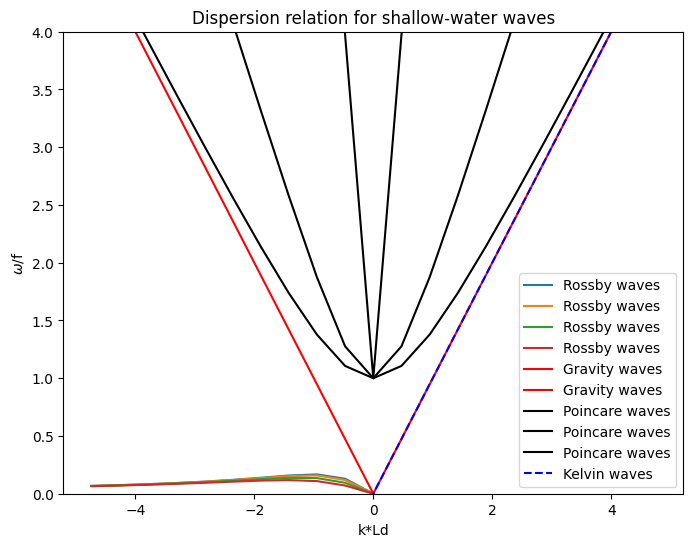

In [70]:
# plot them all together
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ks*Ld, omegas_f_R, label='Rossby waves')
ax.plot(ks*Ld, omegas_f_G, label='Gravity waves', c='red')
ax.plot(ks*Ld, omegas_f_P, label='Poincare waves', c='black')
ax.plot(ks*Ld, omegas_f_K, '--', label='Kelvin waves', c='blue')
ax.legend()
ax.set_xlabel('k*Ld')
ax.set_ylabel('$\omega$/f')
ax.set_ylim([0, 4])
ax.set_title('Dispersion relation for shallow-water waves');